In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
import protfasta
from sparrow import Protein

from scipy.signal import savgol_filter


In [2]:
seqs = protfasta.read_fasta('data/linkers/linker_sequences.fasta')
all_names = list(seqs.keys())
name2len = {n:len(seqs[n]) for n in seqs}
name2len = {k: v for k, v in sorted(name2len.items(), key=lambda item: item[1])}

all_names = list(name2len.keys())

WT_NAME='HC_HAdV5_linker'
name2color = {'CA_CAdV1_linker':'#FF700F',
 'HA_HAdV31_linker':'#010101',
 'HC_SAdV34_linker':'#2B5A9F',
 'HE_SAdV22_linker':'#2B5A9F',
 'HG_HAdV52_linker':'#010101',
 'SA_SAdV20_linker':'#2B5A9F',
 'BA_BAdV1_linker': '#007E01',
 'CA_CAdV2_linker':'#FF700F',
 'HB_HAdV11_linker':'#010101',
 'HC_SAdV43_linker':'#2B5A9F',
 'HE_SAdV25_linker':'#2B5A9F',
 'HG_SAdV7_linker':'#2B5A9F',
 'SA_SAdV3_linker':'#2B5A9F',
 'BtA_BtAdV3_linker':'#7A43CB',
 'EA_EAdV1_linker':'#FF0100',
 'HB_SAdV27_linker':'#2B5A9F',
 'HD_HAdV10_linker':'#010101',
 'HF_HAdV40_linker':'#010101',
 'OA_BAdV2_linker': '#007E01',
 'SB_SAdV49_linker':'#2B5A9F',
 'BtB_BtAdV2_linker':'#7A43CB',
 'HA_HAdV18_linker':'#010101',
 'HC_HAdV5_linker':'#010101',
 'HD_HAdV19_linker':'#010101',
 'HF_HAdV41_linker':'#010101',
 'PC_PAdV5_linker':'#D70DAF',
 'SC_SAdV18_linker':'#2B5A9F' }

labelnames = {'BA_BAdV1_linker':'Bovine',
              'PC_PAdV5_linker' :'Porcine',
              'CA_CAdV1_linker' : 'Canine',
              'BtA_BtAdV3_linker': 'Bat',
              'EA_EAdV1_linker' :'Equine',
              'HF_HAdV40_linker': 'Human',
              'HC_SAdV34_linker' : 'Simian'}
            
    
names_no_cowpig = all_names.copy()
names_no_cowpig.remove('PC_PAdV5_linker')
names_no_cowpig.remove('BA_BAdV1_linker')
names_no_cowpig.remove('OA_BAdV2_linker')


In [7]:
#
# Read in the end-to-end distance data
#


all_re = {}
for n in all_names:
    all_re[n] = np.loadtxt(f'data/linkers/{n}/end_to_end.csv')
        
# compute average Re    
tmp = []
for n in names_no_cowpig:
    tmp.append(np.mean(all_re[n]))

AVERAGE_RE_no_cow_pig = np.mean(tmp)    
        

In [8]:
# read in data for synthetic sequences 
synthetic_lengths = []
synthetic_re = []
synthetic_std_error = []
for L in list(range(45,80,5)):
    t = np.loadtxt(f'data/synthetic_linkers/e2e/RE_LD_{L}.csv')
    synthetic_lengths.append(L)
    synthetic_re.append(np.mean(t))
    synthetic_std_error.append(np.std(t)/np.sqrt(len(t)))
                   
    

In [9]:
# build data for violin plot construction
data = []
for n in all_names:
    data.append(all_re[n])


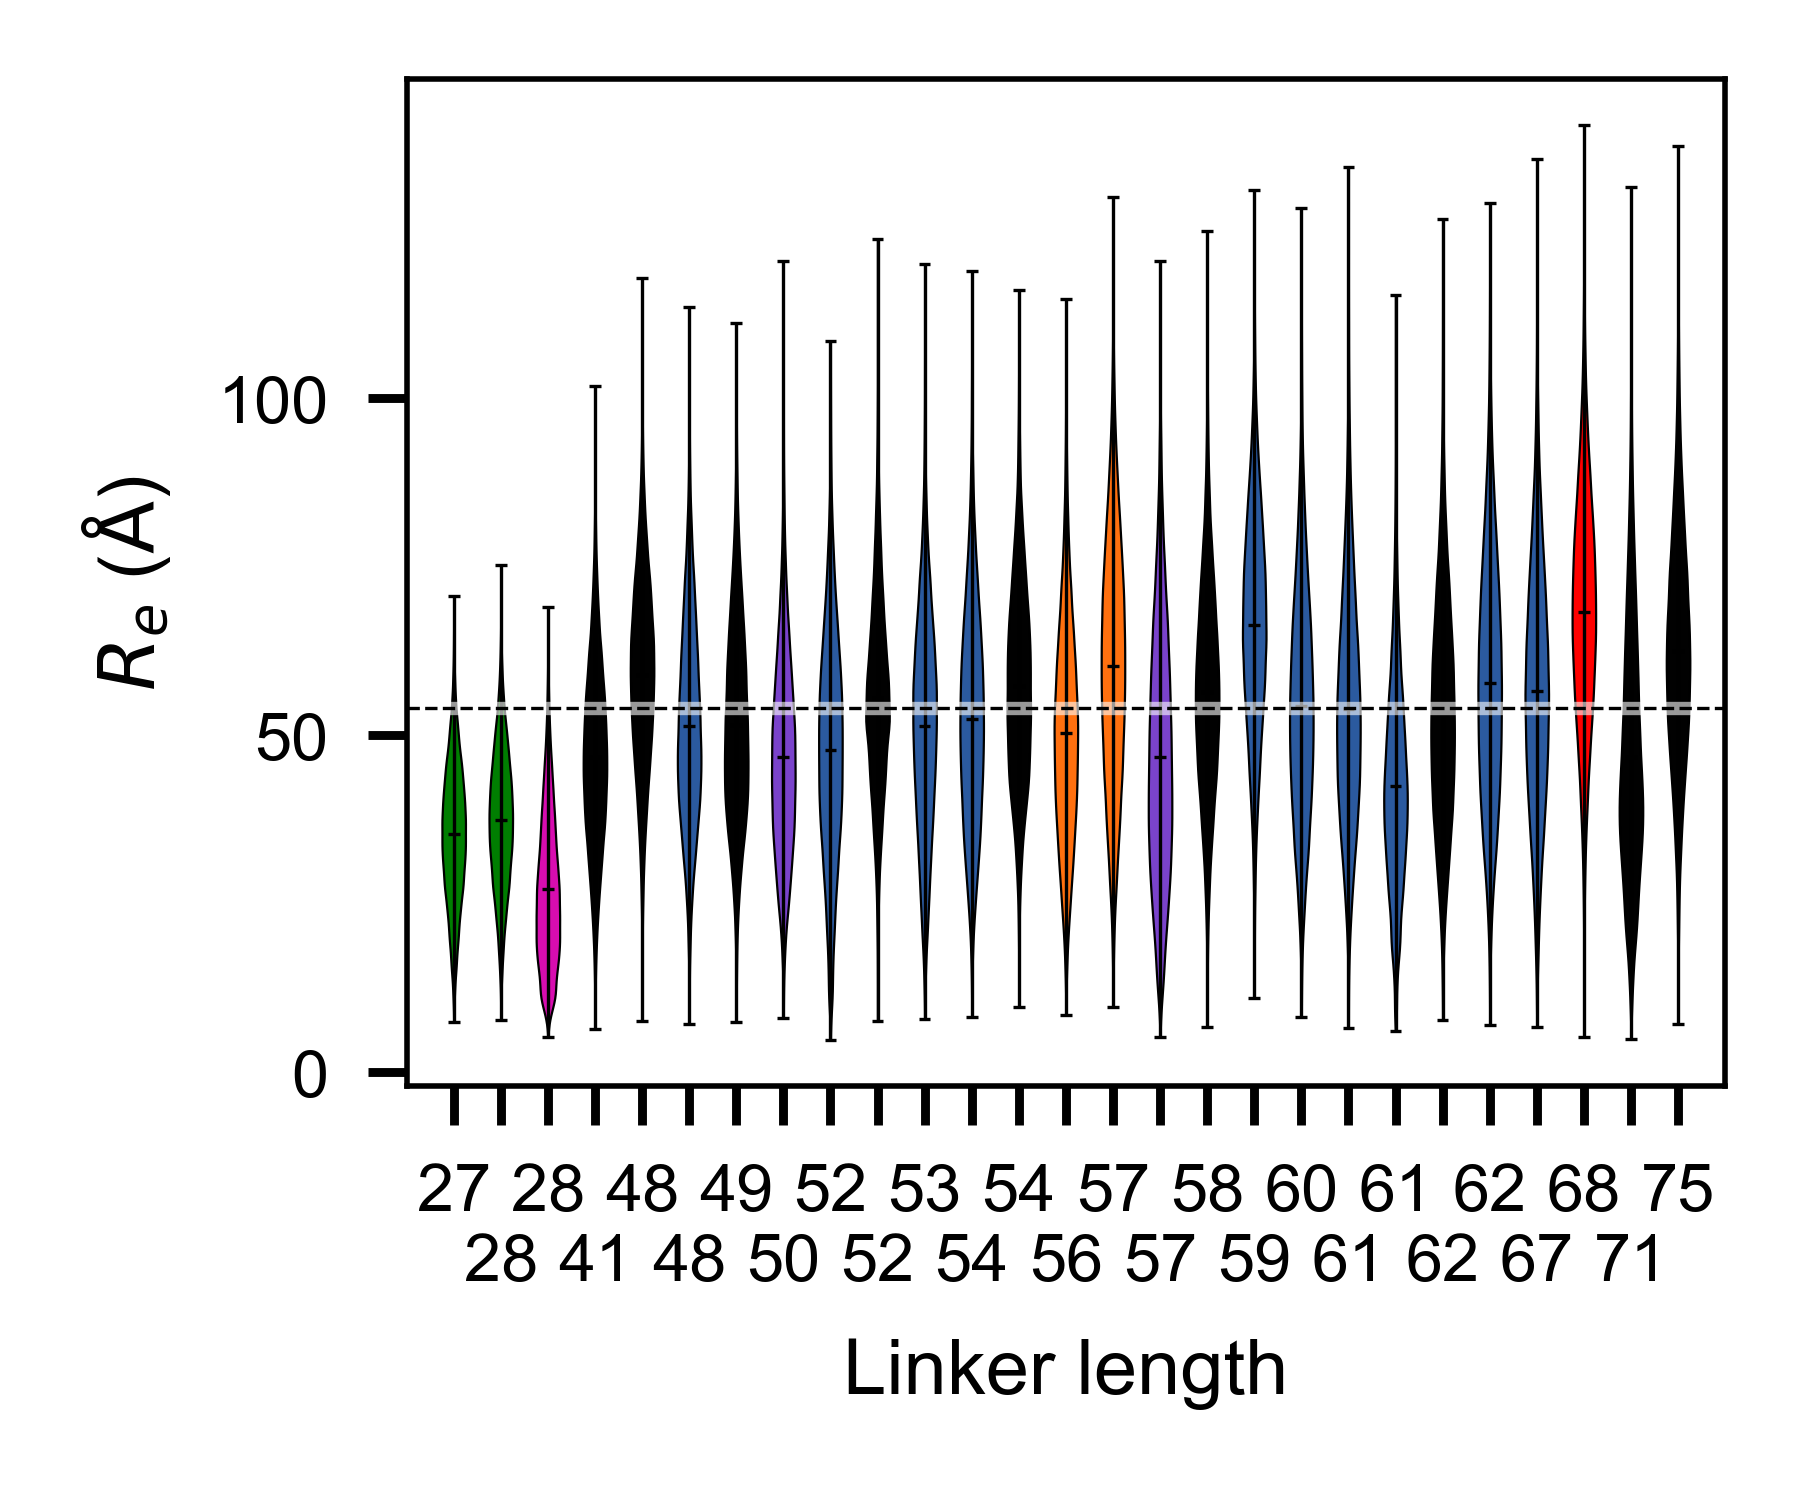

In [10]:
figure(num=None, figsize=(2.3622,1.9685), dpi=400, facecolor='w', edgecolor='k')
ax = plt.gca()

parts = ax.violinplot(data, showmeans=True, showextrema=True)

idx=0
for pc in parts['bodies']:
    
    local_name = all_names[idx]
    color = name2color[local_name]
    idx=idx+1
    
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    pc.set_linewidth(0.2)
    
for x in [parts['cbars'], parts['cmeans'], parts['cmaxes'], parts['cmins']]:
    x.set_linewidth(0.3)    
    x.set_edgecolor('black')    
    x.set_facecolor('black')   

tmp = [str(i) for i in list(name2len.values())]    
length_strings = []
idx=1
for i in tmp:
    if idx % 2 == 0:
        length_strings.append('\n'+i)
    else:
        length_strings.append(i)
    idx=idx+1

    
plt.xticks(np.arange(1,len(all_names)+1), length_strings, fontsize=6)   
plt.yticks(fontsize=6)
plt.ylabel(r'$R_e$ ($\rm\AA$)',fontsize=7)
plt.xlabel(r'Linker length',fontsize=7)
plt.plot([0,31], [AVERAGE_RE_no_cow_pig,AVERAGE_RE_no_cow_pig],'-w',linewidth=1.2, alpha=0.6)
plt.plot([0,31], [AVERAGE_RE_no_cow_pig,AVERAGE_RE_no_cow_pig],'--k',linewidth=0.3)
plt.xlim(0,28)
plt.tight_layout()
plt.savefig('figures/linkers/MAIN_TEXT_linker_re_vs_length.pdf')
plt.savefig('figures/linkers/MAIN_TEXT_linker_re_vs_length.jpeg')

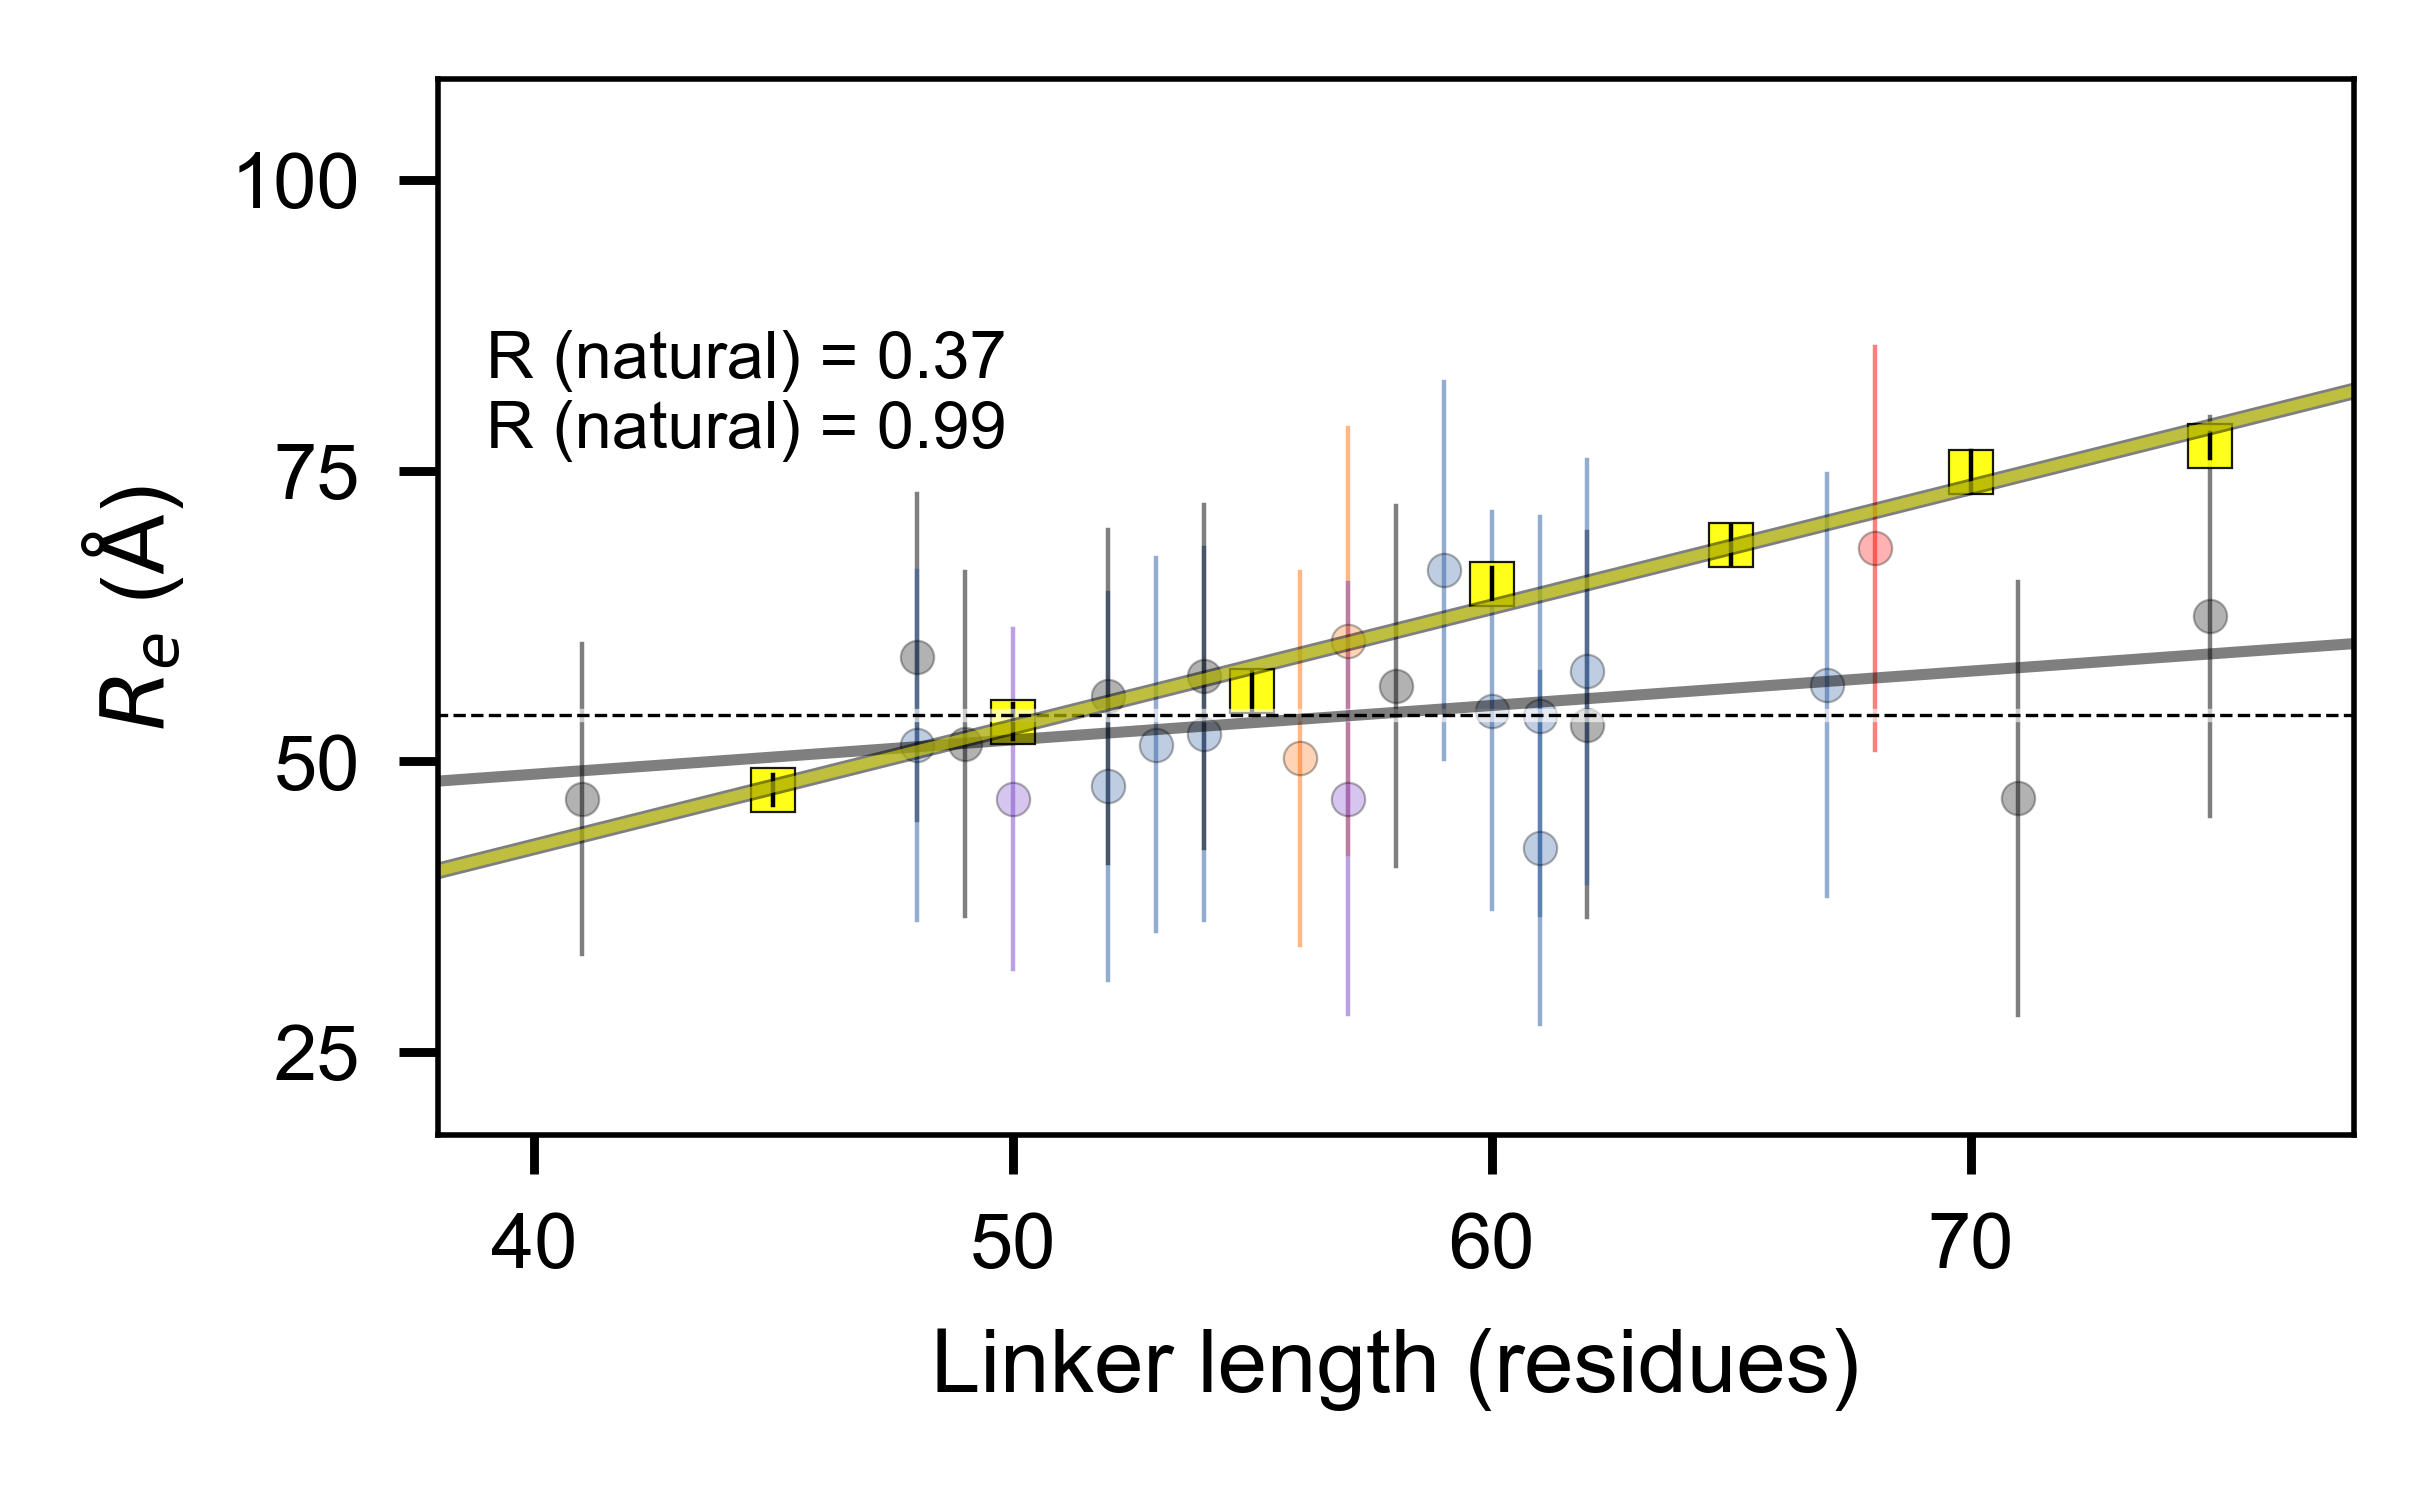

In [11]:
figure(num=None, figsize=(3.14961, 1.9685), dpi=400, facecolor='w', edgecolor='k')
ax = plt.gca()

no_cowpig_mean_re = []
no_cowpig_lengths = []

for n in names_no_cowpig:
    
    lm = np.mean(all_re[n])
    lstd = np.std(all_re[n])
    plt.plot([[name2len[n]],[name2len[n]]], [lm-lstd,lm+lstd],'-',color=name2color[n],lw=0.4, alpha=0.5)
    
    no_cowpig_mean_re.append(lm)
    no_cowpig_lengths.append(name2len[n])
    



for n in names_no_cowpig:
    
    lm = np.mean(all_re[n])
    plt.plot([name2len[n]], [lm], 'o', color=name2color[n],mec='k',mew=0.2,ms=3,alpha=0.3)
    



for idx in range(len(synthetic_lengths)):
    
    llen = synthetic_lengths[idx]
    lm = synthetic_re[idx]
    lstd = synthetic_std_error[idx]
    
    
    plt.plot([llen], [lm],'s', color='yellow',mec='k',mew=0.2,ms=4,alpha=0.9)
    plt.plot([llen,llen], [lm-lstd,lm+lstd],'-',color='k',lw=0.4)

    
plt.plot([30,80], [AVERAGE_RE_no_cow_pig,AVERAGE_RE_no_cow_pig],'-w',linewidth=1.2, alpha=0.6)
plt.plot([35,80], [AVERAGE_RE_no_cow_pig,AVERAGE_RE_no_cow_pig],'--k',linewidth=0.3)
plt.xlim([38,78])
    
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Linker length (residues)',fontsize=8)
plt.ylabel(r'$R_e$ ($\rm\AA$)', fontsize=8)



r_nat = np.corrcoef(no_cowpig_lengths, no_cowpig_mean_re)[0][1]
r_synth = np.corrcoef(synthetic_lengths, synthetic_re)[0][1]

f1 = np.polyfit(no_cowpig_lengths, no_cowpig_mean_re,1)
x_test = np.array([20,100])
plt.plot(x_test, x_test*f1[0]+f1[1],'-k',linewidth=1, alpha=0.5)

f2 = np.polyfit(synthetic_lengths, synthetic_re,1)
x_test = np.array([20,100])

plt.plot(x_test, x_test*f2[0]+f2[1],'-',linewidth=1.5, color='k', alpha=0.5)
plt.plot(x_test, x_test*f2[0]+f2[1],'-',linewidth=1, color='yellow',alpha=0.5)



plt.text(39,83, f'R (natural) = {r_nat:.2f}',fontsize=6)
plt.text(39,77, f'R (natural) = {r_synth:.2f}',fontsize=6)
plt.tight_layout()




plt.savefig('figures/linkers/linker_re_vs_length_with_synthetic.jpeg')
plt.savefig('figures/linkers/linker_re_vs_length_with_synthetic.pdf')
